# Life expectancy & GDP data
Codecademy portfolio project

Data from the WHO & World Bank

## Objectives
- Identify the relationships between GDP & life expectancy for six countries

## Process
- Explore source data
- Wrangle data into useable formats
- Visualise data

### All countries on the same plot

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera
import seaborn as sns

In [2]:
# Load data

df = pd.read_csv('all_data.csv')
df.rename(columns={'Life expectancy at birth (years)': 'LE'}, inplace=True)
df['GDP adjusted'] = df['GDP'] / 10_000_000_000

cl = df[df['Country'] == 'Chile'] #Chile
cn = df[df['Country'] == 'China'] #China
de = df[df['Country'] == 'Germany'] #Germany
mx = df[df['Country'] == 'Mexico'] #Mexio
us = df[df['Country'] == 'United States of America'] #USA
zw = df[df['Country'] == 'Zimbabwe'] #Zimbabwe

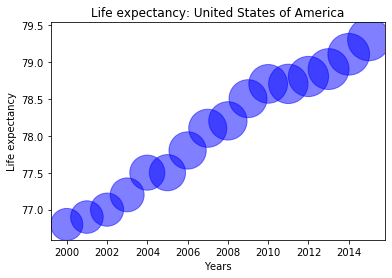

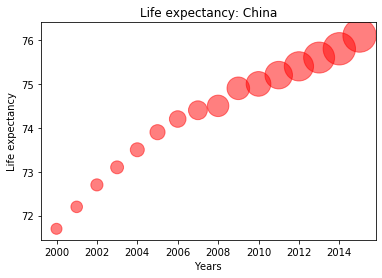

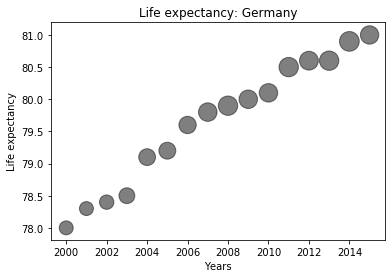

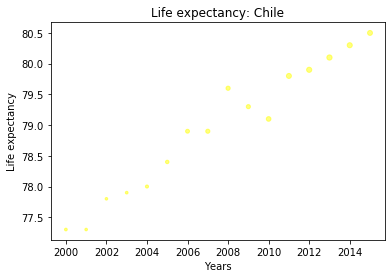

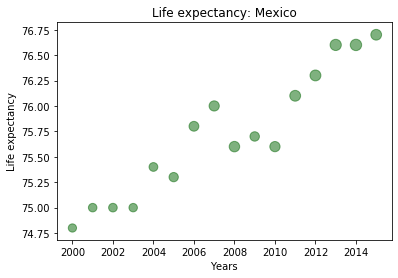

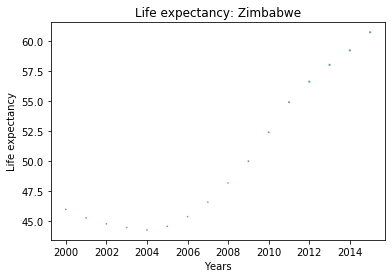

In [3]:
# Plot life expectancy data on individual scatter charts


def plot_country_le(data, colour='blue'):
    data = data.reset_index(drop=True)
    ax = plt.scatter(data['Year'], data['LE'], alpha=0.5, color=colour, s=data['GDP adjusted'])
    plt.title('Life expectancy: ' + data['Country'][0])
    plt.xlabel('Years')
    plt.ylabel('Life expectancy')
    plt.show()

plot_country_le(us, 'blue')
plot_country_le(cn, 'red')
plot_country_le(de, 'black')
plot_country_le(cl, 'yellow')
plot_country_le(mx, 'darkgreen')
plot_country_le(zw, 'green')




## Just using the original data frame and presenting it two ways

### On one graphic in different plots

In [4]:
# Get list of countries present

def unique(l):
    r1 = set()
    r2 = r1.add
    return [i for i in l if not (i in r1 or r2(i))]


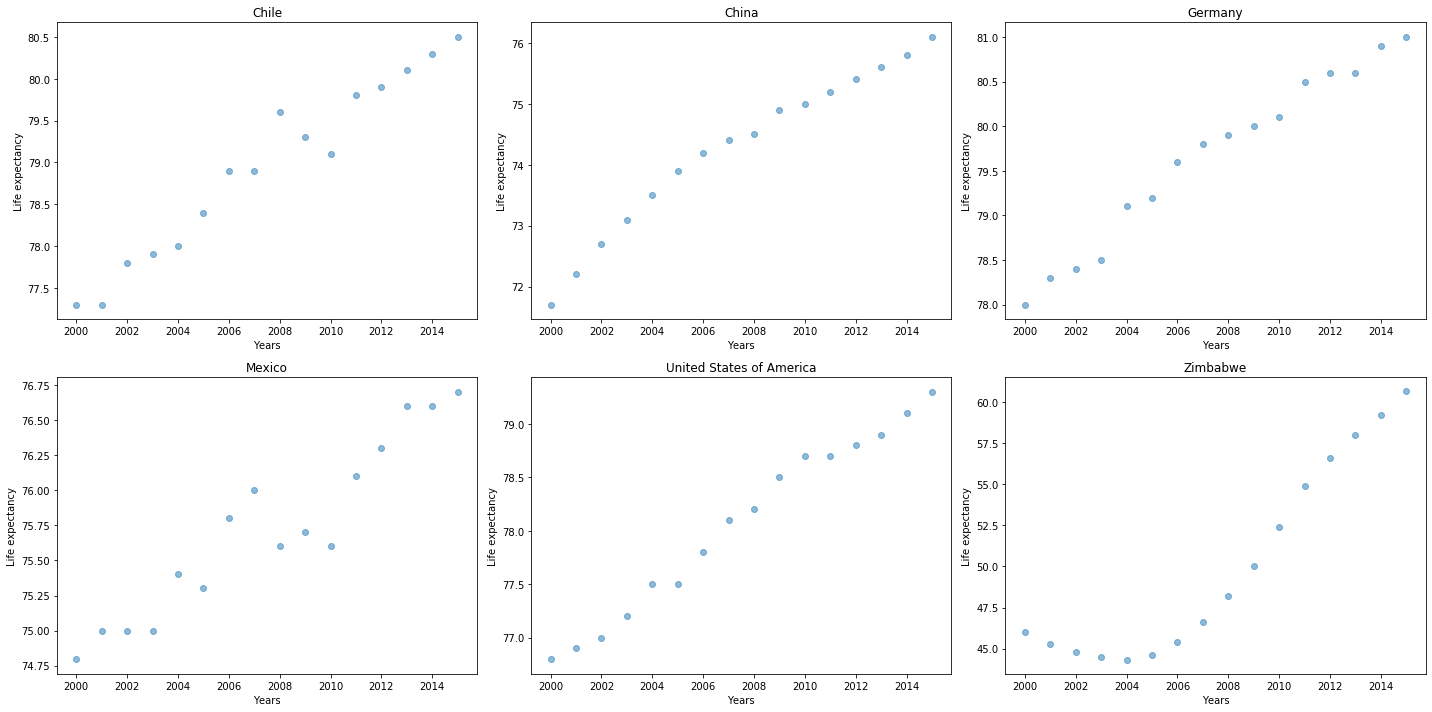

In [5]:
# Plot each country
countries = unique(df['Country'])

plt.figure(figsize=(20, 10))
for i in countries:
    plt.subplot(2,3,countries.index(i) + 1)
    plt.scatter(df['Year'].loc[df['Country'] == i], df['LE'].loc[df['Country'] == i], alpha=0.5)
    plt.xlabel('Years')
    plt.ylabel('Life expectancy')
    plt.title(i)

plt.subplots_adjust(wspace=0.35, hspace=0.5, bottom=0)
plt.tight_layout()
plt.show()

### All countries on the same plot


Size of the dots represent the GDP of the country


<Figure size 432x288 with 0 Axes>

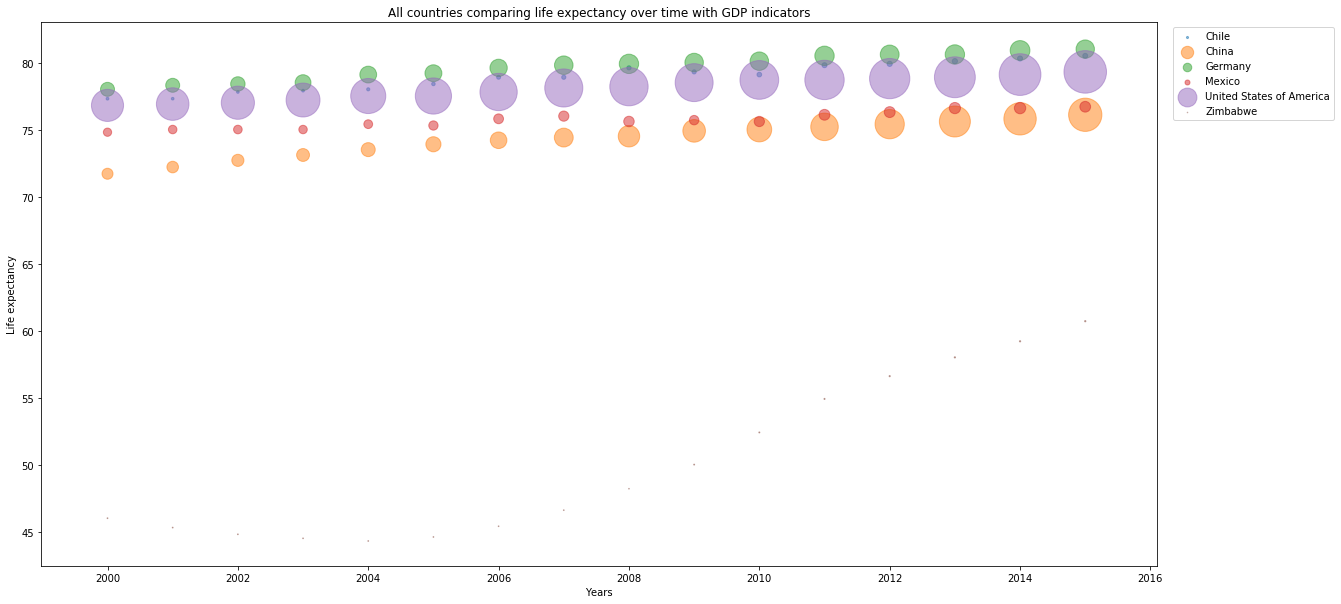

In [6]:
plt.clf()

plt.figure(figsize=(20,10))
print('Size of the dots represent the GDP of the country')
for i in countries:
    plt.scatter(df['Year'].loc[df['Country'] == i], df['LE'].loc[df['Country'] == i], alpha=0.5, label=i, s=df['GDP adjusted'].loc[df['Country'] == i])
    
plt.xlabel('Years')
plt.ylabel('Life expectancy')
plt.title('All countries comparing life expectancy over time with GDP indicators')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), markerscale=0.5) 
plt.show()

## Life expectancy vs GDP

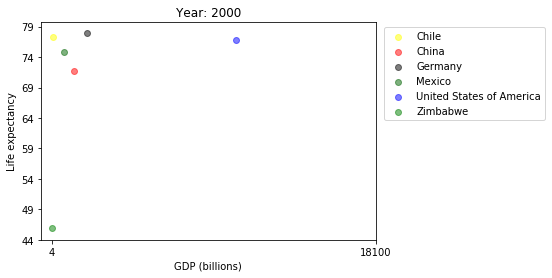

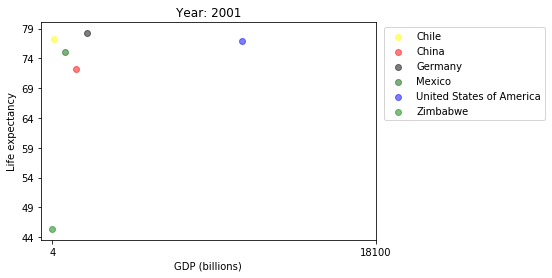

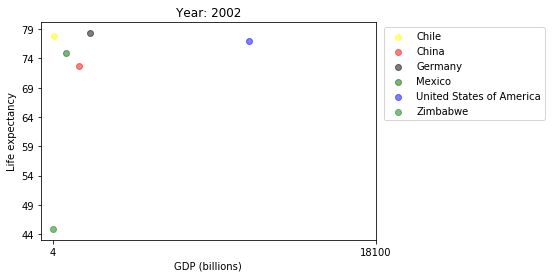

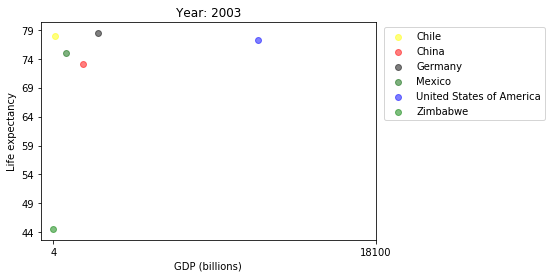

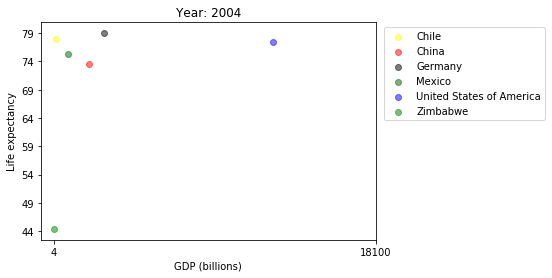

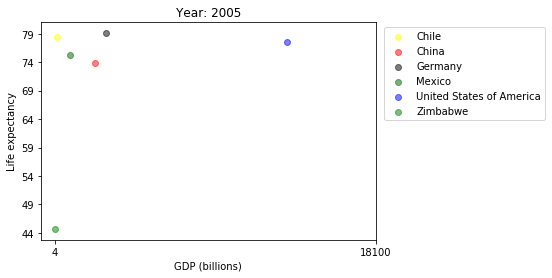

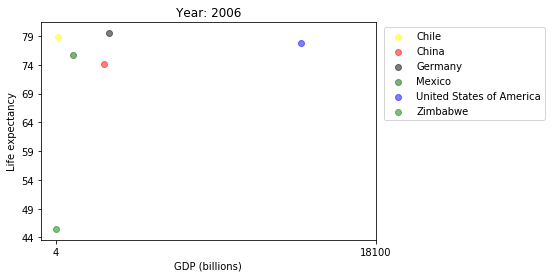

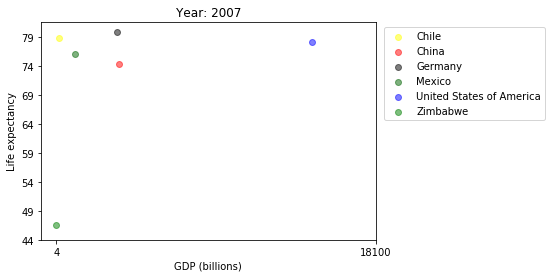

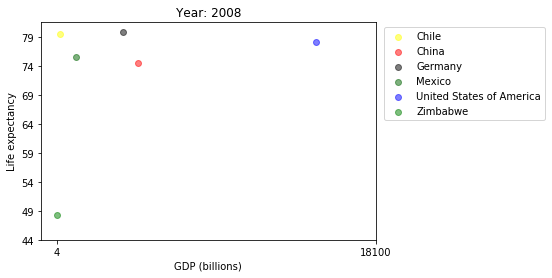

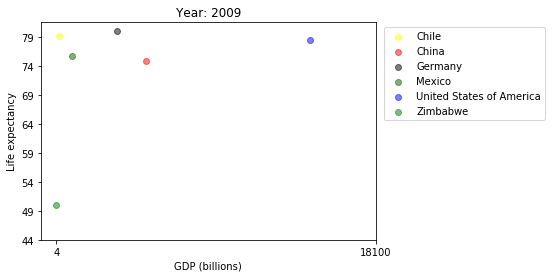

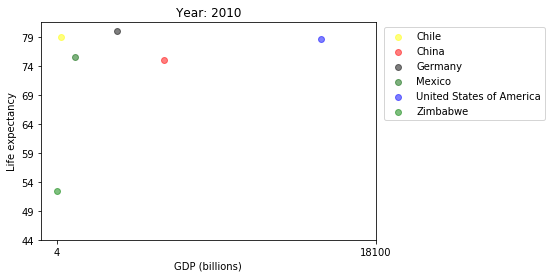

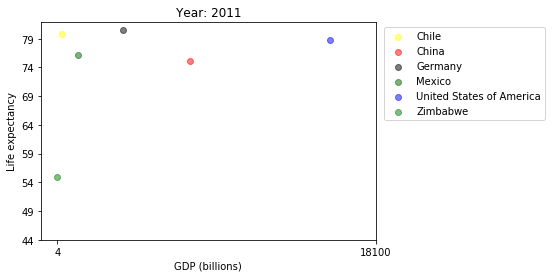

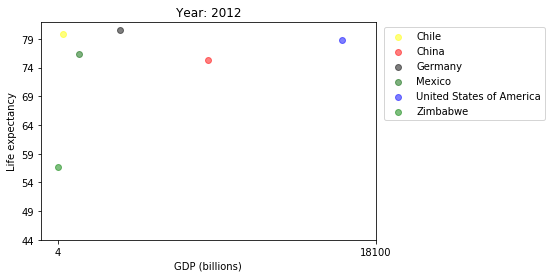

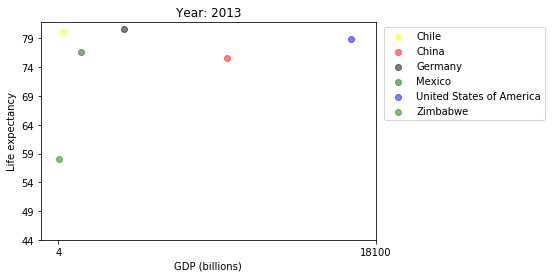

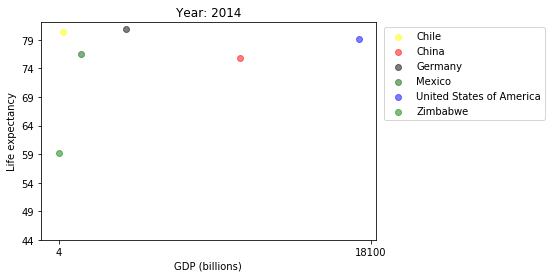

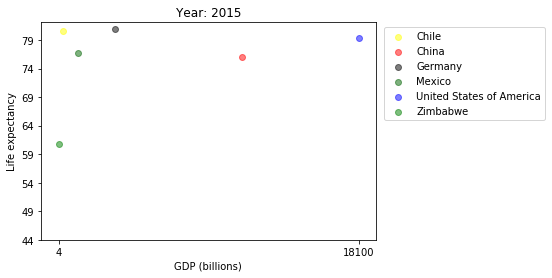

In [125]:
plt.clf()
years = unique(df['Year'])
xmax = max(df['GDP']) / 1_000_000_000
xmin = min(df['GDP']) / 1_000_000_000
ymax = round(max(df['LE']))
ymin = round(min(df['LE']))
colours = {
    'Chile': 'yellow',
    'Germany': 'black',
    'China': 'red',
    'Mexico': 'darkgreen',
    'United States of America': 'blue',
    'Zimbabwe': 'green'
}

for i in years:
    for j in countries:
        plt.scatter(df['GDP'].loc[(df['Year'] == i) & (df['Country'] == j)] / 1_000_000_000, df['LE'].loc[(df['Year'] == i) & (df['Country'] == j)], alpha=0.5, label=j, c=colours[j])
    plt.title('Year: ' + str(i))
    plt.xticks(ticks=(xmin, xmax))
    plt.xlabel('GDP (billions)')
    plt.yticks(ticks=(range(ymin, ymax, 5)))
    plt.ylabel('Life expectancy')
    leg = plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
    plt.show()


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.HTMLWriter'> instead.


<Figure size 432x288 with 0 Axes>

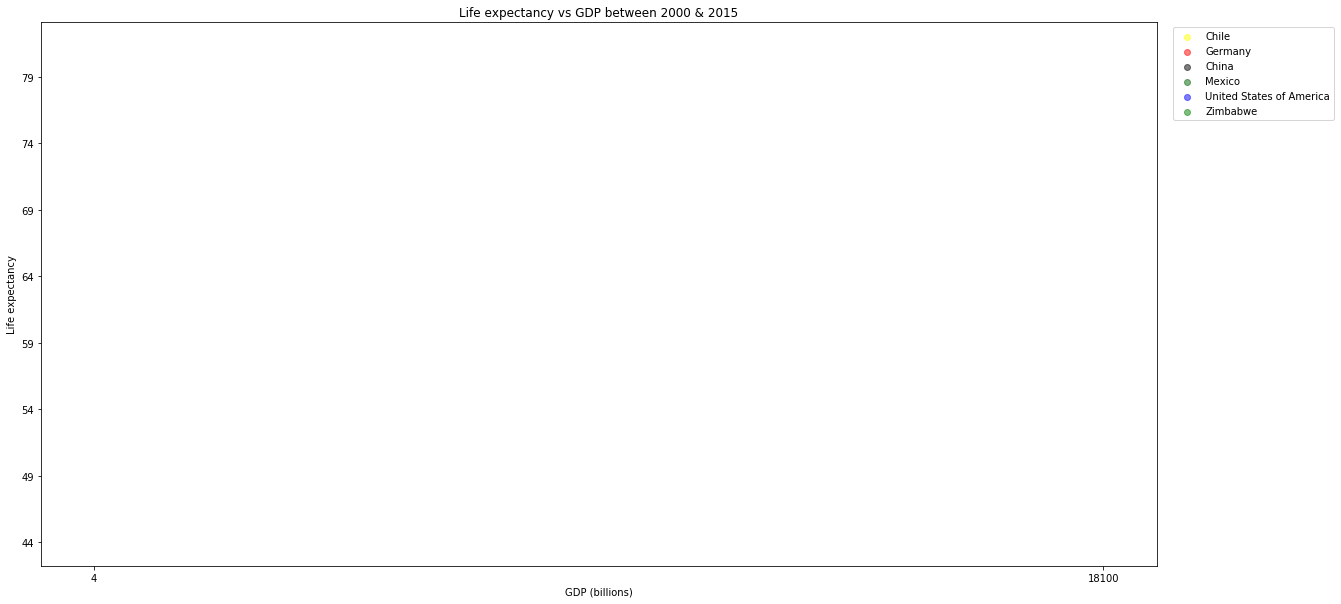

In [8]:
# Animate these graphs into one to tell a story over time

plt.clf()
fig = plt.figure(figsize=(20, 10))
camera = Camera(fig)

for i in years:
    for j in countries:
        plt.scatter(df['GDP'].loc[(df['Year'] == i) & (df['Country'] == j)] / 1_000_000_000, df['LE'].loc[(df['Year'] == i) & (df['Country'] == j)], alpha=0.5, label=j, c=colours[j])
    plt.title('Life expectancy vs GDP between 2000 & 2015')
    plt.xticks(ticks=(xmin, xmax))
    plt.xlabel('GDP (billions)')
    plt.yticks(ticks=(range(ymin, ymax, 5)))
    plt.ylabel('Life expectancy')
    plt.annotate(i, xy=(0.5, 0.95), xycoords='axes fraction')
    camera.snap()

plt.legend(colours, loc='upper left', bbox_to_anchor=(1.01, 1))
anim = camera.animate()
anim.save('animation.html')

## Percentage changes in life expectancy & GDP over the 15 year period 

In [9]:
# Mean & change functions

def find_growth(country, var):
    start = min(df['Year'])
    end = max(df['Year'])
    new = df[var].loc[(df['Year'] == end) & (df['Country'] == country)].values[0]
    old = df[var].loc[(df['Year'] == start) & (df['Country'] == country)].values[0]
    return ( new - old ) / old


<Figure size 432x288 with 0 Axes>

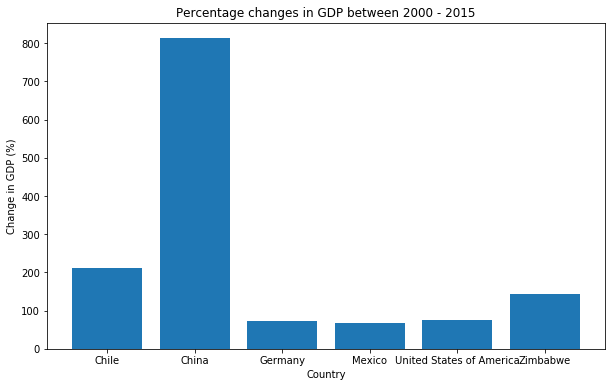

<Figure size 432x288 with 0 Axes>

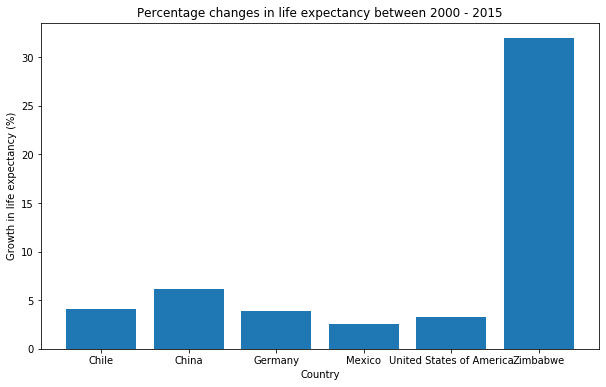

In [10]:
# Bar graph of percentage changes

plt.clf()

# GDP
plt.figure(figsize=[10,6])
GDP_changes = []
for i in countries:
    GDP_changes.append(find_growth(i, 'GDP') * 100)
plt.bar(countries, GDP_changes)
plt.title('Percentage changes in GDP between 2000 - 2015')
plt.xlabel('Country')
plt.ylabel('Change in GDP (%)')
plt.show()

plt.clf()

# Life expectancy
plt.figure(figsize=[10,6])
LE_changes = []
for i in countries:
    LE_changes.append(find_growth(i, 'LE') * 100)
plt.bar(countries, LE_changes)
plt.title('Percentage changes in life expectancy between 2000 - 2015')
plt.xlabel('Country')
plt.ylabel('Growth in life expectancy (%)')
plt.show()

### Scatter plot of the above data

In [200]:
df_growth = {'Country': countries, 'LE': LE_changes, 'GDP': GDP_changes}
df_growth = pd.DataFrame(data=df_growth)
df_growth['Colour'] = df_growth['Country'].map(colours)
df_growth

,Country,LE,GDP,Colour
0,Chile,4.139715,211.475850,yellow
1,China,6.136681,813.418913,red
2,Germany,3.846154,73.112644,black
3,Mexico,2.540107,68.545801,darkgreen
4,United States of America,3.255208,75.728155,blue
5,Zimbabwe,31.956522,143.718552,green


<Figure size 432x288 with 0 Axes>

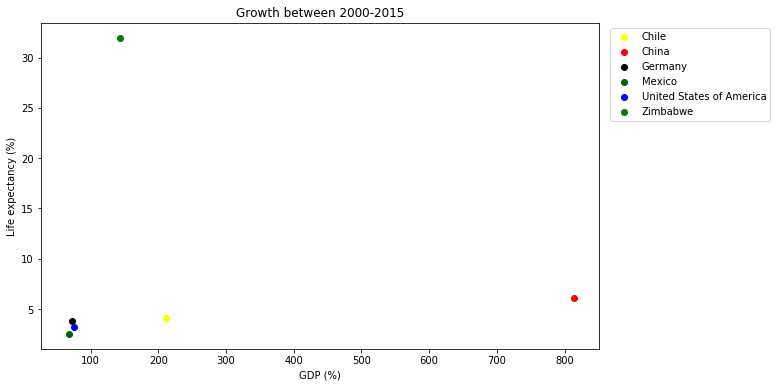

In [203]:
plt.clf()

plt.figure(figsize=[10,6])
for i, j in df_growth.iterrows():
    plt.scatter(j['GDP'], j['LE'], label=j['Country'], c=j['Colour'])
plt.xlabel('GDP (%)')
plt.ylabel('Life expectancy (%)')
plt.title('Growth between 2000-2015')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.show()

# Insights from the data

- Zimbabwe is an outlier with regards to life expectancy growth, moving from 46 to 61 during the period. This is an increase of 32%. Though it could be argued that Zimbabwe had the most to gain as they were significantly below the other five countries for life expectancy at the start of the period.
- Zimbabwe has also increased GDP by 144% which is third on the list.
- China is an outlier for GDP growth, increasing by 813% over the 15 year period.
- China had the second highest growth in life expectancy, growing 6.1%.
- The US, Germany and Mexico all grew GDP and life expectancy but at a more modest rate, as seen in the cluster in the bottom corner of the growth scatter chart.
- Chile also had impressive GDP growth of 211%, which was the second highest in the dataset.